In [1]:
#Mission: It is your job to predict if a passenger survived the sinking of the Titanic or not. For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.
#Evaluation: Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
#data を取得
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

In [3]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#欠損値の状況を把握
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(12)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


/Users/tanakamarunatsurou/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


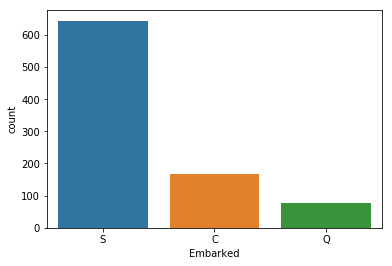

In [5]:
#Cabinは削除
df_train = df_train.drop(['Cabin'], axis=1)

#Embarked,二個だけなので最も多い値を入れとく
sns.countplot(x='Embarked', data=df_train)

In [6]:
df_train["Embarked"] = df_train["Embarked"].fillna("S")

#イニシャルから、age予測
df_train['Initial']=0
for i in df_train:
    df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.')


pd.crosstab(df_train.Initial,df_train.Sex).T.style.background_gradient(cmap='summer_r')

/Users/tanakamarunatsurou/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [7]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

df_train.groupby('Initial')['Age'].mean() 

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [8]:
#Age補充
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46

In [9]:
#欠損値処理完了
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(12)

,Total,Percent
Initial,0,0.0
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [10]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
5,6,0,3,"Moran, Mr. James",male,33.0,0,0,330877,8.4583,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs


In [11]:
#カテゴリデータ(Name,Sex,Ticket,Embarked,Initial)の処理
#関係なさそうなやつは削除
df_train = df_train.drop(['PassengerId','Name','Ticket','Initial'], axis=1)

In [12]:
sex_dum = pd.get_dummies(df_train['Sex'])
df_train = pd.concat((df_train,sex_dum),axis=1)
df_train = df_train.drop('Sex',axis=1)
 
emb_dum = pd.get_dummies(df_train['Embarked'])
df_train = pd.concat((df_train,emb_dum),axis=1)
df_train = df_train.drop('Embarked',axis=1)

In [13]:
df_train.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [14]:
#Family sizeを錬成
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train = df_train.drop(['SibSp','Parch'], axis=1)

In [15]:
#データの下準備完了
df_train_data = df_train.drop(['Survived'], axis=1)
df_train_data.head()

,Pclass,Age,Fare,female,male,C,Q,S,FamilySize
0,3,22.0,7.2500,0,1,0,0,1,2
1,1,38.0,71.2833,1,0,1,0,0,2
2,3,26.0,7.9250,1,0,0,0,1,1
3,1,35.0,53.1000,1,0,0,0,1,2
4,3,35.0,8.0500,0,1,0,0,1,1


In [16]:
#まず、SVM
X_1 = df_train_data.values
y_1 = df_train.loc[:,['Survived']].values
y_1 = y_1.reshape(-1)

In [17]:
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

from sklearn.svm import SVC
svc = SVC(kernel='rbf', gamma=0.1, C=10)
svc.fit(X_1_train, y_1_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
svc.score(X_1_test,y_1_test)

0.73134328358208955

In [19]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_1)
X_1_std = scaler.transform(X_1)

X_1_std_train, X_1_std_test, y_1_train, y_1_test = train_test_split(X_1_std, y_1, test_size=0.3, random_state=0)

from sklearn.svm import SVC
svc_2 = SVC(kernel='rbf', gamma=0.1, C=10)
svc_2.fit(X_1_std_train, y_1_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
print(svc_2.score(X_1_std_train,y_1_train))
svc_2.score(X_1_std_test,y_1_test)

0.847512038523


0.82462686567164178

In [21]:
#決定木
from sklearn.tree import DecisionTreeClassifier
tree_1 = DecisionTreeClassifier(random_state=0)
tree_1.fit(X_1_train, y_1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [22]:
tree_1.score(X_1_test,y_1_test)

0.76119402985074625

In [23]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
rfc_1 = RandomForestClassifier(random_state=0, n_estimators=10)
rfc_1.fit(X_1_train, y_1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
rfc_1.score(X_1_test,y_1_test)

0.80223880597014929

In [25]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
#欠損値の状況を把握
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000
Ticket,0,0.000000


In [27]:
#submission
df_test = df_test.drop(['Cabin','Ticket'], axis=1)

#Family sizeを錬成
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test = df_test.drop(['SibSp','Parch'], axis=1)

#Fareを補充
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())

#Ageを補充
df_test['Initial']=0
for i in df_test:
    df_test['Initial']=df_test.Name.str.extract('([A-Za-z]+)\.')

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mrs'],inplace=True)

df_test.groupby('Initial')['Age'].mean() 

/Users/tanakamarunatsurou/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


Initial
Master     7.406471
Miss      21.774844
Mr        32.114130
Mrs       38.904762
Other     42.750000
Name: Age, dtype: float64

In [28]:
#Ageを補充
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age']=32
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age']=39
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age']=7
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age']=22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age']=43

In [29]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Initial
0,892,3,"Kelly, Mr. James",male,34.5,7.8292,Q,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S,2,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,8.6625,S,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,S,3,Mrs


In [30]:
df_test = df_test.drop(['Name','Initial'], axis=1)

sex_dum = pd.get_dummies(df_test['Sex'])
df_test = pd.concat((df_test,sex_dum),axis=1)
df_test = df_test.drop('Sex',axis=1)
 
emb_dum = pd.get_dummies(df_test['Embarked'])
df_test = pd.concat((df_test,emb_dum),axis=1)
df_test = df_test.drop('Embarked',axis=1)

In [31]:
df_test.head(5)

,PassengerId,Pclass,Age,Fare,FamilySize,female,male,C,Q,S
0,892,3,34.5,7.8292,1,0,1,0,1,0
1,893,3,47.0,7.0000,2,1,0,0,0,1
2,894,2,62.0,9.6875,1,0,1,0,1,0
3,895,3,27.0,8.6625,1,0,1,0,0,1
4,896,3,22.0,12.2875,3,1,0,0,0,1


In [32]:
X_test = df_test.drop(['PassengerId'], axis=1)

In [33]:
X_test.head(5)

,Pclass,Age,Fare,FamilySize,female,male,C,Q,S
0,3,34.5,7.8292,1,0,1,0,1,0
1,3,47.0,7.0000,2,1,0,0,0,1
2,2,62.0,9.6875,1,0,1,0,1,0
3,3,27.0,8.6625,1,0,1,0,0,1
4,3,22.0,12.2875,3,1,0,0,0,1


In [34]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test_std = scaler.transform(X_test)

In [35]:
y_pred=svc_2.predict(X_test_std)

In [36]:
X_new_train = df_train.drop(['Survived','male','S'], axis=1)
X_new_train.head()

,Pclass,Age,Fare,female,C,Q,FamilySize
0,3,22.0,7.2500,0,0,0,2
1,1,38.0,71.2833,1,1,0,2
2,3,26.0,7.9250,1,0,0,1
3,1,35.0,53.1000,1,0,0,2
4,3,35.0,8.0500,0,0,0,1


In [37]:
scaler = StandardScaler()
scaler.fit(X_new_train)
X_new_std = scaler.transform(X_new_train)

X_new_std_train, X_new_std_test, y_1_train, y_1_test = train_test_split(X_new_std, y_1, test_size=0.3, random_state=0)

from sklearn.svm import SVC
svc_2 = SVC(kernel='rbf', gamma=0.1, C=10)
svc_2.fit(X_new_std_train, y_1_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
print(svc_2.score(X_new_std_train,y_1_train))
svc_2.score(X_new_std_test,y_1_test)

0.845906902087


0.82462686567164178

In [39]:
X_test_2 = df_test.drop(['PassengerId','male','S'], axis=1)

scaler = StandardScaler()
scaler.fit(X_test_2)
X_test_2_std = scaler.transform(X_test_2)

In [40]:
y_pred_2=svc_2.predict(X_test_2_std)

In [41]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_pred_2
    })
submission.to_csv('submission3.csv',index=False)